In [1]:
import pandas as pd
import numpy as np

In [2]:
loan_data_preprocessed_backup = pd.read_csv("loan_data_preprocessed_2007_2014.csv")

/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/539504596.py:1: DtypeWarning: Columns (20,48) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_preprocessed_backup = pd.read_csv("loan_data_preprocessed_2007_2014.csv")


In [3]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [4]:
# It is good practice to include data with enough time to repay after defaulted

In [5]:
loan_data_preprocessed['total_rev_hi_lim'].fillna(loan_data_preprocessed['funded_amnt'], inplace=True)

/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/2719707983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_preprocessed['total_rev_hi_lim'].fillna(loan_data_preprocessed['funded_amnt'], inplace=True)


In [6]:
loan_data_preprocessed['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [7]:
loan_data_defaults = loan_data_preprocessed.loc[loan_data_preprocessed['loan_status'].isin(['Charged Off',
                                                                                            'Does not meet the credit policy. Status:Charged Off'])]

In [8]:
pd.options.display.max_rows = None

In [9]:
loan_data_defaults.isnull().sum()

Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                                          2337
home_ownership                                     

In [10]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)

/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/188862553.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/188862553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['

In [11]:
loan_data_defaults['mths_since_last_record'].fillna(0, inplace = True)

/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/19061281.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_defaults['mths_since_last_record'].fillna(0, inplace = True)
/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/19061281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mt

In [12]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/2670870593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']


In [13]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [14]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])

/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/1601776879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/1601776879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])


In [15]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt'] 

/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/2332741466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']


In [16]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [17]:
loan_data_defaults.to_csv('loan_data_defaults.csv')

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

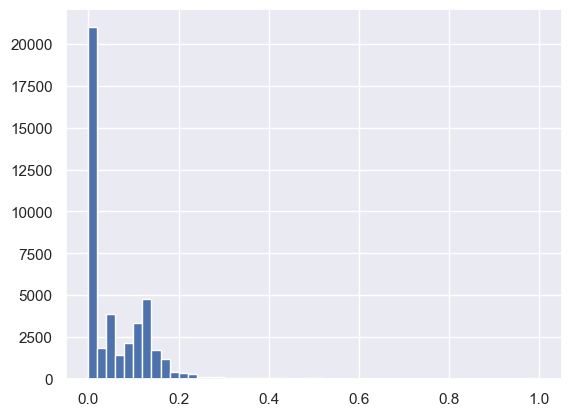

In [19]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)
plt.show()

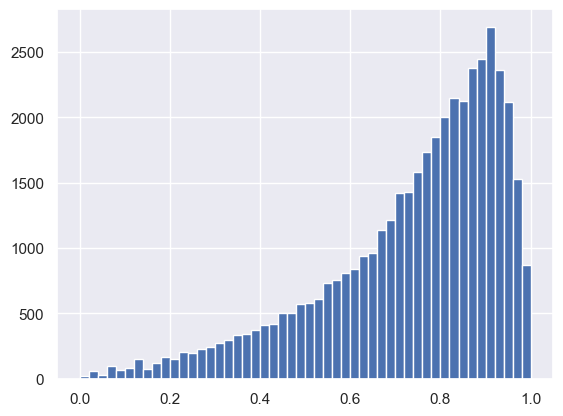

In [20]:
plt.hist(loan_data_defaults['CCF'], bins = 50)
plt.show()

In [21]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0,0,1)

/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/1868139848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0,0,1)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test,\
lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1),
                                                                       loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)


In [24]:
features_all = ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'home_ownership_MORTGAGE',
'home_ownership_NONE',
'home_ownership_OTHER',
'home_ownership_OWN',
'home_ownership_RENT',
'verification_status_Not Verified',
'verification_status_Source Verified',
'verification_status_Verified',
'purpose_car',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_educational',
'purpose_home_improvement',
'purpose_house',
'purpose_major_purchase',
'purpose_medical',
'purpose_moving',
'purpose_other',
'purpose_renewable_energy',
'purpose_small_business',
'purpose_vacation',
'purpose_wedding',
'initial_list_status_f',
'initial_list_status_w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']
# List of all independent variables for the models.

In [25]:
features_reference_cat = ['grade_G',
'home_ownership_RENT',
'verification_status_Verified',
'purpose_credit_card',
'initial_list_status_f']
# List of the dummy variable reference categories. 

In [26]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(columns = features_reference_cat)

In [27]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = (np.dot((X / denom).T,X)).astype(float) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [28]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

/Users/berling/credit_risk_modeling_python/.venv_crm/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
feature_name = lgd_inputs_stage_1_train.columns.values

In [30]:
feature_name

array(['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'purpose_car',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'initial_list_status_w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [31]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.711328e-06,NaN
1,grade_A,-1.014964e-07,9.999990e-01
2,grade_B,-2.796288e-05,9.996737e-01
3,grade_C,-7.673816e-05,9.990730e-01
4,grade_D,2.611921e-05,9.996969e-01
5,grade_E,1.439628e-05,9.998485e-01
6,grade_F,5.375858e-05,9.995075e-01
7,home_ownership_MORTGAGE,-2.404701e-05,9.992453e-01
8,home_ownership_NONE,6.589374e-07,9.999993e-01
9,home_ownership_OTHER,9.218581e-07,9.999981e-01


In [32]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(columns = features_reference_cat)
yhat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)
yhat_test_lgd_stage_1

array([1, 1, 0, ..., 0, 1, 1], shape=(8648,))

In [33]:
yhat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)

In [34]:
yhat_test_proba_lgd_stage_1 = yhat_test_proba_lgd_stage_1[:][:,1]

In [35]:
yhat_test_proba_lgd_stage_1

array([0.60016543, 0.60355826, 0.44700529, ..., 0.41717756, 0.60642613,
       0.56618159], shape=(8648,))

In [36]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test.copy()
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)

In [37]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp,
                                       pd.DataFrame(yhat_test_proba_lgd_stage_1)], axis = 1)

In [38]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test',
                                     'yhat_test_proba_lgd_stage_1']

In [39]:
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index

# Estimating accuracy of the model

In [40]:
tr = 0.5
df_actual_predicted_probs['yhat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['yhat_test_proba_lgd_stage_1']> tr, 1, 0)

In [41]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'],
            df_actual_predicted_probs['yhat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.116096,0.318918
1,0.087072,0.477914


In [42]:
#accuracy
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'],
            df_actual_predicted_probs['yhat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] +\
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'],
            df_actual_predicted_probs['yhat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

np.float64(0.5940101757631823)

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

In [44]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'],
                                 df_actual_predicted_probs['yhat_test_proba_lgd_stage_1'])

In [45]:
len(fpr)

3943

Text(0.5, 1.0, 'ROC Curve')

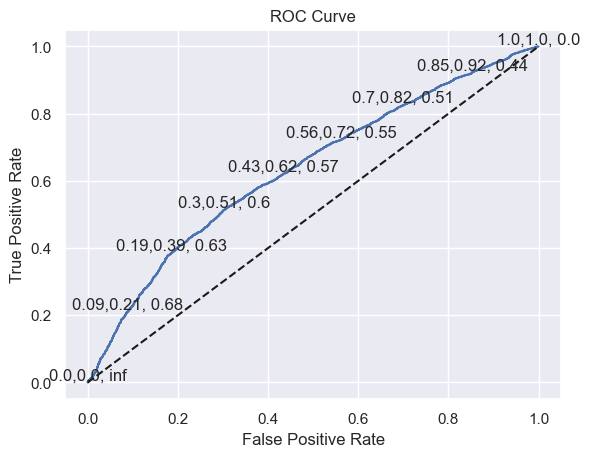

In [46]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
point_diff = 500
count = 0
for i, j, k in zip(fpr, tpr, thresholds):
    if (count == 0) or (count % point_diff == 0) or (count == len(fpr) - 1):
        plt.text(i, j, f'{round(i,2)},{round(j,2)}, {round(k, 2)}', ha = 'center', va = 'bottom')
    count += 1
plt.title('ROC Curve')

In [47]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'],
                      df_actual_predicted_probs['yhat_test_proba_lgd_stage_1']
                      )
AUROC

np.float64(0.6338451842900644)

# Saving the Model

In [48]:
import pickle

In [49]:
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav','wb'))

# Stage 2 Linear Regression

In [50]:
lgd_stage_2_data = loan_data_defaults.loc[loan_data_defaults['recovery_rate_0_1'] == 1]

In [51]:
loan_data_defaults.loc[loan_data_defaults['recovery_rate_0_1'] == 1].head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,recovery_rate,CCF,recovery_rate_0_1
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,False,False,False,False,False,True,False,0.046832,0.817416,1
8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,False,False,False,False,False,True,False,0.033761,0.971068,1
9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,...,False,False,False,False,False,True,False,0.050100,0.874701,1
12,12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,...,False,False,False,False,False,True,False,0.049367,0.860429,1
14,14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,...,False,False,False,False,False,True,False,0.064510,0.456653,1


In [52]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test =\
    train_test_split(lgd_stage_2_data.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1),
                     lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)

In [54]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept = True,  copy_X = True, n_jobs = 1):
        super().__init__(fit_intercept = fit_intercept, copy_X=copy_X, n_jobs=n_jobs)
        self.fit_intercept = fit_intercept
        #self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        
    def fit(self, X, y, n_jobs = 1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis = 0)/ float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_/se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [55]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)

In [56]:
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(lgd_inputs_stage_2_train.astype(float), lgd_targets_stage_2_train.astype(float))

LinearRegression()

In [57]:
feature_name = lgd_inputs_stage_2_train.columns.values

In [58]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values.round(3)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.407513e-01,NaN
1,grade_A,-6.798942e-02,0.000
2,grade_B,-5.063321e-02,0.000
3,grade_C,-3.731186e-02,0.000
4,grade_D,-2.706291e-02,0.000
5,grade_E,-1.308701e-02,0.002
6,grade_F,-5.239445e-03,0.277
7,home_ownership_MORTGAGE,2.846402e-03,0.059
8,home_ownership_NONE,1.459388e-01,0.000
9,home_ownership_OTHER,-9.301508e-03,0.650


In [59]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)

In [60]:
yhat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)

In [61]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test.copy()

In [62]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)

In [63]:
pd.concat([lgd_targets_stage_2_test_temp,
           pd.DataFrame(yhat_test_lgd_stage_2)],
          axis = 1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.307408
0,0.307408,1.000000


/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/3726244632.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lgd_targets_stage_2_test - yhat_test_lgd_stage_2)


<Axes: xlabel='recovery_rate', ylabel='Density'>

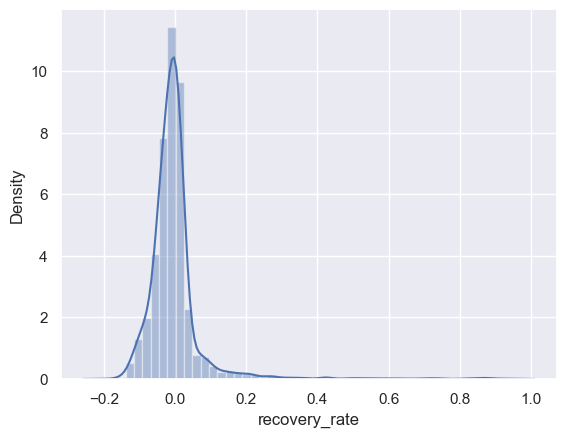

In [64]:
sns.distplot(lgd_targets_stage_2_test - yhat_test_lgd_stage_2)

In [65]:
pickle.dump(reg_lgd_st_2,open('lgd_model_stage_2.sav','wb'))

# Combining stage 1 and stage 2

In [66]:
yhat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [67]:
yhat_test_lgd_stage_2_all

array([0.11963888, 0.09575284, 0.13359172, ..., 0.12097906, 0.11598135,
       0.15644173], shape=(8648,))

In [68]:
yhat_test_lgd = yhat_test_lgd_stage_1 * yhat_test_lgd_stage_2_all

In [69]:
pd.DataFrame(yhat_test_lgd).describe()

,0
count,8648.000000
mean,0.086771
std,0.051009
min,-0.008036
25%,0.059683
50%,0.101033
75%,0.124508
max,0.237215


In [70]:
yhat_test_lgd = np.where(yhat_test_lgd < 0, 0, yhat_test_lgd)
yhat_test_lgd = np.where(yhat_test_lgd > 1, 1, yhat_test_lgd)

# EAD Model

# Estimation & Interpretation

In [71]:
loan_data_defaults.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,recovery_rate,CCF,recovery_rate_0_1
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,False,False,False,False,False,True,False,0.046832,0.817416,1
8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,False,False,False,False,False,True,False,0.033761,0.971068,1
9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,...,False,False,False,False,False,True,False,0.050100,0.874701,1
12,12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,...,False,False,False,False,False,True,False,0.049367,0.860429,1
14,14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,...,False,False,False,False,False,True,False,0.064510,0.456653,1


In [72]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1),
                                                                                          loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)


In [73]:
ead_inputs_train = ead_inputs_train[features_all]
ead_inputs_train = ead_inputs_train.drop(columns = features_reference_cat)

In [74]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept = True, copy_X = True, n_jobs = 1):
        super().__init__(fit_intercept = fit_intercept, copy_X = copy_X, n_jobs = n_jobs)
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        
    def fit(self, X, y, n_jobs = 1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis = 0)/ float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_/se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self
        

In [76]:
reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train.astype(float), ead_targets_train.astype(float))

LinearRegression()

In [77]:
feature_name = ead_inputs_train.columns.values

In [78]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_ead.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.112657e+00,NaN
1,grade_A,-3.035427e-01,0.000000e+00
2,grade_B,-2.368780e-01,0.000000e+00
3,grade_C,-1.723318e-01,0.000000e+00
4,grade_D,-1.200979e-01,0.000000e+00
5,grade_E,-6.784878e-02,0.000000e+00
6,grade_F,-2.056586e-02,4.247351e-03
7,home_ownership_MORTGAGE,-6.321319e-03,2.734300e-03
8,home_ownership_NONE,-5.441346e-03,9.331172e-01
9,home_ownership_OTHER,-2.099889e-03,9.425184e-01


In [79]:
ead_inputs_test = ead_inputs_test[features_all]

In [80]:
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)

In [81]:
yhat_test_ead = reg_ead.predict(ead_inputs_test)

In [82]:
ead_targets_test_temp = ead_targets_test.copy()

In [83]:
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)

In [84]:
pd.concat([ead_targets_test_temp, pd.DataFrame(yhat_test_ead)], axis = 1).corr()

,CCF,0
CCF,1.000000,0.530055
0,0.530055,1.000000


/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/3658599685.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ead_targets_test -  yhat_test_ead)


<Axes: xlabel='CCF', ylabel='Density'>

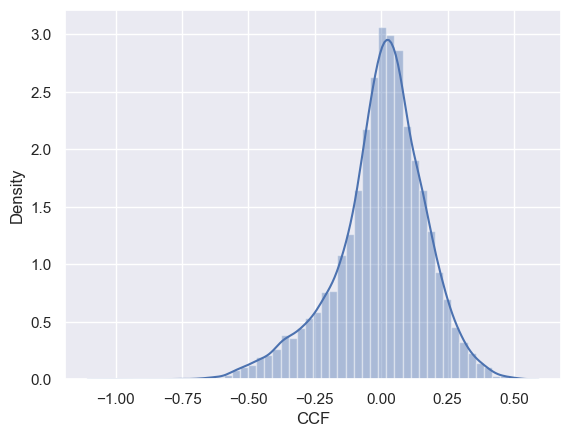

In [85]:
sns.distplot(ead_targets_test -  yhat_test_ead)

In [86]:
pd.DataFrame(yhat_test_ead).describe()

,0
count,8648.000000
mean,0.736020
std,0.105086
min,0.382893
25%,0.661734
50%,0.731652
75%,0.810574
max,1.168832


In [87]:
yhat_test_ead = np.where(yhat_test_ead < 0 ,0, yhat_test_ead)
yhat_test_ead = np.where(yhat_test_ead > 1 ,1, yhat_test_ead)

# Expected Loss

In [88]:
loan_data_preprocessed.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,False,False,False,False,False,False,False,False,True,False
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,False,False,False,False,False,False,False,False,True,False
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,False,False,False,False,False,False,False,False,True,False
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,False,False,False,False,False,False,False,False,True,False
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,False,False,False,False,False,False,False,False,True,False


In [89]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)

/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/1047595283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)


In [90]:
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)

/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_63531/3996673359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)


In [91]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]

In [92]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(columns = features_reference_cat)

In [93]:
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)

In [94]:
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)

In [95]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1'] * loan_data_preprocessed['recovery_rate_st_2']

In [96]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])


In [97]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate'] 

In [98]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)

In [99]:
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF'])


In [100]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed['funded_amnt']

In [101]:
loan_data_preprocessed['EAD'].describe()

count    466285.000000
mean      10813.035147
std        6933.942102
min         189.233943
25%        5494.353605
50%        9207.533899
75%       14689.951621
max       35000.000000
Name: EAD, dtype: float64

In [130]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv')
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv')

In [131]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,mths_since_last_delinq_31-56,mths_since_last_delinq_>=57,total_rev_hi_lim_<=5K,total_rev_hi_lim_5K-10K,total_rev_hi_lim_10K-20K,total_rev_hi_lim_20K-30K,total_rev_hi_lim_30K-40K,total_rev_hi_lim_40K-55K,total_rev_hi_lim_55K-95K,total_rev_hi_lim_>95K
0,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,0,0,0,0,0,0,0,1,0
1,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,0,0,0,0,0,0,0
2,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,1,0,0,0,0,0,1,0,0,0
3,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,0,1,0,0,0,0,0
4,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,0,0,0,0,0,0,0,0,0


In [132]:
loan_data_inputs_test.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,mths_since_last_delinq_31-56,mths_since_last_delinq_>=57,total_rev_hi_lim_<=5K,total_rev_hi_lim_5K-10K,total_rev_hi_lim_10K-20K,total_rev_hi_lim_20K-30K,total_rev_hi_lim_30K-40K,total_rev_hi_lim_40K-55K,total_rev_hi_lim_55K-95K,total_rev_hi_lim_>95K
0,362514,19677589,21900299,32500,32500,32500.0,60 months,14.99,773.01,C,...,0,0,0,0,0,1,0,0,0,0
1,288564,29755527,32278795,11000,11000,11000.0,60 months,20.99,297.53,E,...,0,0,0,0,0,1,0,0,0,0
2,213591,1343334,1588314,30000,30000,30000.0,36 months,14.65,1034.83,C,...,1,0,0,0,0,0,0,0,0,0
3,263083,33131681,35775007,14400,14400,14400.0,60 months,14.49,338.74,C,...,0,0,0,0,1,0,0,0,0,0
4,165001,3293168,4066358,15000,15000,14900.0,36 months,8.90,476.30,A,...,1,0,0,1,0,0,0,0,0,0


In [133]:
loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test],axis = 0)

In [134]:
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')

In [135]:
features_all_pd = ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'home_ownership_RENT_OTHER_NONE_ANY',
'home_ownership_OWN',
'home_ownership_MORTGAGE',
'addr_state_ND_NE_IA_NV_FL_HI_AL',
'addr_state_NM_VA',
'addr_state_NY',
'addr_state_OK_TN_MO_LA_MD_NC',
'addr_state_CA',
'addr_state_UT_KY_AZ_NJ',
'addr_state_AR_MI_PA_OH_MN',
'addr_state_RI_MA_DE_SD_IN',
'addr_state_GA_WA_OR',
'addr_state_WI_MT',
'addr_state_TX',
'addr_state_IL_CT',
'addr_state_KS_SC_CO_VT_AK_MS',
'addr_state_WV_NH_WY_DC_ME_ID',
'verification_status_Not Verified',
'verification_status_Source Verified',
'verification_status_Verified',
'purpose_educ__sm_b__wedd__ren_en__mov__house',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_oth__med__vacation',
'purpose_major_purch__car__home_impr',
'initial_list_status_f',
'initial_list_status_w',
'term_36',
'term_60',
'emp_length_0',
'emp_length_1',
'emp_length_2-4',
'emp_length_5-6',
'emp_length_7-9',
'emp_length_10',
'mths_since_issue_d_<38',
'mths_since_issue_d_38-39',
'mths_since_issue_d_40-41',
'mths_since_issue_d_42-48',
'mths_since_issue_d_49-52',
'mths_since_issue_d_53-64',
'mths_since_issue_d_65-84',
'mths_since_issue_d_>84',
'int_rate_<9.548',
'int_rate_9.548-12.025',
'int_rate_12.025-15.74',
'int_rate_15.74-20.281',
'int_rate_>20.281',
'mths_since_earliest_cr_line_<140',
'mths_since_earliest_cr_line_141-164',
'mths_since_earliest_cr_line_165-247',
'mths_since_earliest_cr_line_248-270',
'mths_since_earliest_cr_line_271-352',
'mths_since_earliest_cr_line_>352',
'inq_last_6mths_0',
'inq_last_6mths_1-2',
'inq_last_6mths_3-6',
'inq_last_6mths_>6',
'acc_now_delinq_0',
'acc_now_delinq_>=1',
'annual_inc_<20K',
'annual_inc_20K-30K',
'annual_inc_30K-40K',
'annual_inc_40K-50K',
'annual_inc_50K-60K',
'annual_inc_60K-70K',
'annual_inc_70K-80K',
'annual_inc_80K-90K',
'annual_inc_90K-100K',
'annual_inc_100K-120K',
'annual_inc_120K-140K',
'annual_inc_>140K',
'dti_<=1.4',
'dti_1.4-3.5',
'dti_3.5-7.7',
'dti_7.7-10.5',
'dti_10.5-16.1',
'dti_16.1-20.3',
'dti_20.3-21.7',
'dti_21.7-22.4',
'dti_22.4-35',
'dti_>35',
'mths_since_last_delinq_Missing',
'mths_since_last_delinq_0-3',
'mths_since_last_delinq_4-30',
'mths_since_last_delinq_31-56',
'mths_since_last_delinq_>=57',
'mths_since_last_record_Missing',
'mths_since_last_record_0-2',
'mths_since_last_record_3-20',
'mths_since_last_record_21-31',
'mths_since_last_record_32-80',
'mths_since_last_record_81-86',
'mths_since_last_record_>=86']

In [136]:
ref_categories_pd = ['grade_G',
'home_ownership_RENT_OTHER_NONE_ANY',
'addr_state_ND_NE_IA_NV_FL_HI_AL',
'verification_status_Verified',
'purpose_educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status_f',
'term_60',
'emp_length_0',
'mths_since_issue_d_>84',
'int_rate_>20.281',
'mths_since_earliest_cr_line_<140',
'inq_last_6mths_>6',
'acc_now_delinq_0',
'annual_inc_<20K',
'dti_>35',
'mths_since_last_delinq_0-3',
'mths_since_last_record_0-2']

In [137]:
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(columns = ref_categories_pd)

In [138]:
import pickle

In [139]:
reg_pd = pickle.load(open('pd_model.sav','rb'))

In [140]:
loan_data_inputs_pd['PD'] = reg_pd.predict_proba(loan_data_inputs_pd_temp)[:][:,0]

In [141]:
loan_data_inputs_pd['PD'].describe()

count    466285.000000
mean          0.109220
std           0.070334
min           0.007528
25%           0.056245
50%           0.093548
75%           0.146631
max           0.534157
Name: PD, dtype: float64

In [142]:
loan_data_preprocessed.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,recovery_rate_st_1,recovery_rate_st_2,recovery_rate,LGD,CCF,EAD
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,False,False,True,False,1,0.086341,0.086341,0.913659,0.590312,2951.559548
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,False,False,True,False,1,0.084451,0.084451,0.915549,0.777885,1944.711453
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,False,False,True,False,1,0.080650,0.080650,0.919350,0.658630,1580.712126
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,False,False,True,False,1,0.095259,0.095259,0.904741,0.661227,6612.274352
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,False,False,True,False,1,0.088549,0.088549,0.911451,0.708269,2124.806102


In [147]:
loan_data_inputs_pd.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_delinq_>=57,total_rev_hi_lim_<=5K,total_rev_hi_lim_5K-10K,total_rev_hi_lim_10K-20K,total_rev_hi_lim_20K-30K,total_rev_hi_lim_30K-40K,total_rev_hi_lim_40K-55K,total_rev_hi_lim_55K-95K,total_rev_hi_lim_>95K,PD
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,A5,...,0,0,0,0,0,0,0,1,0,0.027950
206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,C1,...,0,0,0,0,0,0,0,0,0,0.115067
136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,A5,...,0,0,0,0,0,1,0,0,0,0.036149
412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,D1,...,0,0,0,1,0,0,0,0,0,0.198267
36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,C2,...,0,0,0,0,0,0,0,0,0,0.208550


In [148]:
loan_data_preprocessed.shape[0], loan_data_inputs_pd.shape[0]

(466285, 466285)

In [149]:
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed.set_index('Unnamed: 0'), loan_data_inputs_pd], axis = 1)

In [150]:
loan_data_preprocessed_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_delinq_>=57,total_rev_hi_lim_<=5K,total_rev_hi_lim_5K-10K,total_rev_hi_lim_10K-20K,total_rev_hi_lim_20K-30K,total_rev_hi_lim_30K-40K,total_rev_hi_lim_40K-55K,total_rev_hi_lim_55K-95K,total_rev_hi_lim_>95K,PD
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0,0,0,0,0,0,0,0,0,0.163589
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0,0,0,0,0,0,0,0,0,0.281239
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0,0,0,0,0,0,0,0,0,0.208370
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0,0,0,0,0,0,0,0,0,0.209304
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0,0,0,0,0,0,0,0,0,0.131061


In [151]:
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']

In [152]:
loan_data_preprocessed_new['EL'].describe()

count    466285.000000
mean       1077.721363
std        1093.771259
min           8.778736
25%         353.380394
50%         705.024832
75%        1399.072643
max       12357.332680
Name: EL, dtype: float64

In [153]:
loan_data_preprocessed_new['funded_amnt'].describe()

,funded_amnt,funded_amnt
count,466285.000000,466285.000000
mean,14291.801044,14291.801044
std,8274.371300,8274.371300
min,500.000000,500.000000
25%,8000.000000,8000.000000
50%,12000.000000,12000.000000
75%,20000.000000,20000.000000
max,35000.000000,35000.000000


In [154]:
loan_data_preprocessed_new['EL'].sum()

np.float64(502525305.5748469)

In [155]:
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()

funded_amnt    0.075408
funded_amnt    0.075408
dtype: float64